<a href="https://colab.research.google.com/github/nurfkutlu/Customer-Profiles-by-Clustering-Method/blob/main/Customer_Profiles_by_Clustering_Method.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**CONTENTS**

1.   IMPORTING LIBRARIES


*   Loading Dataset


2.   DATA MANUPULATING


*   Data Cleaning
*   Drop Missing Rows

*   Object Arrangements
*   MathematicalArrangements

*   Descriptions for rows
*   Rearrangements


3.   DATA VISUALISATION


*   General Histogram Graph
*   Correlation

4.   CLUSTERING ANALYSIS

*   Data Preprocessing
*   Dimensionality reduction with PCA and Plotting

*   K value
*   Evaluating Models


5.   CONCLUSION









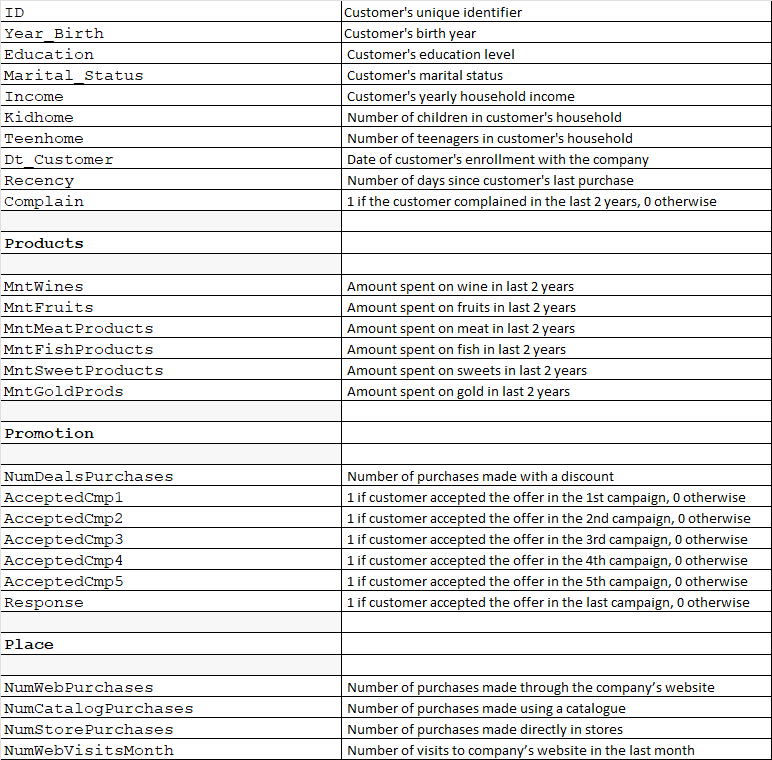

# **1. IMPORTING LIBRARIES**




In [45]:
#Importing the Libraries
import numpy as np
import pandas as pd
import datetime
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn import metrics
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap


> **LOADING DATASET**



In [46]:
#Loading the dataset

df = pd.read_csv("/content/drive/MyDrive/MY DATASET/CUSTOMER SEGMENTETION/marketing_campaign.csv", sep="\t")
df.shape
# number of datapoints are 2240.

(2240, 29)

In [47]:
df.head().T # ı want to see exact column by variables. So ı choose the take transpose.

,0,1,2,3,4
ID,5524,2174,4141,6182,5324
Year_Birth,1957,1954,1965,1984,1981
Education,Graduation,Graduation,Graduation,Graduation,PhD
Marital_Status,Single,Single,Together,Together,Married
Income,58138.0,46344.0,71613.0,26646.0,58293.0
Kidhome,0,1,0,1,1
Teenhome,0,1,0,0,0
Dt_Customer,04-09-2012,08-03-2014,21-08-2013,10-02-2014,19-01-2014
Recency,58,38,26,26,94
MntWines,635,11,426,11,173


In [48]:
#columns name
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [49]:
#information about data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

# **2. DATA MANUPULATING**


> **Data Cleaning**




In [50]:
#Data Cleaning


print(df.isnull().sum())

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64


We see that there are 24 null values at Income pieces of knowledge, 24 is few. So I decided to drop the rows that are missing.



> **Drop Missing Rows**



In [51]:
#Drop missing rows
df=df.dropna()
print(df.info())
print("The total number of data-points after removing the rows with missing values are:", len(df))


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2216 non-null   int64  
 1   Year_Birth           2216 non-null   int64  
 2   Education            2216 non-null   object 
 3   Marital_Status       2216 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2216 non-null   int64  
 6   Teenhome             2216 non-null   int64  
 7   Dt_Customer          2216 non-null   object 
 8   Recency              2216 non-null   int64  
 9   MntWines             2216 non-null   int64  
 10  MntFruits            2216 non-null   int64  
 11  MntMeatProducts      2216 non-null   int64  
 12  MntFishProducts      2216 non-null   int64  
 13  MntSweetProducts     2216 non-null   int64  
 14  MntGoldProds         2216 non-null   int64  
 15  NumDealsPurchases    2216 non-null   i



> **Object Arrangements**




In [52]:
# Object Arrangement for datatypes
  #Time management
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer']) #  convert dtype from object to datatime to work on row in the future
df.Dt_Customer

<ipython-input-52-9d70d5148f26>:3: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer']) #  convert dtype from object to datatime to work on row in the future


0      2012-04-09
1      2014-08-03
2      2013-08-21
3      2014-10-02
4      2014-01-19
          ...    
2235   2013-06-13
2236   2014-10-06
2237   2014-01-25
2238   2014-01-24
2239   2012-10-15
Name: Dt_Customer, Length: 2216, dtype: datetime64[ns]

In [53]:
# Object Arrangement for datatypes

 #Age management
exact_time= datetime.datetime.today()
todays_year=exact_time.year

df["Age"]=todays_year-df["Year_Birth"]

  #Education investing
print(f"Education categories are : \n",df["Education"].value_counts(),"\n")

   #Marital Status Investing
print(f"Marital status are : \n",df["Marital_Status"].value_counts())


Education categories are : 
 Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: Education, dtype: int64 

Marital status are : 
 Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64


In [54]:
#Reprocessing of education and marital status for common knowledges
 #Education
  # I reduce 3 category of education and necessary arrangements are done.
df["Education"]=df["Education"].replace({"Basic":"Undergraduate","2n Cycle":"Undergraduate", "Graduation":"Graduate", "Master":"PhD",})

 # Marital Status
  #ı reduce 2 category of marital status and change the row name as relationship
df["Relationship"]=df["Marital_Status"].replace({"Married":"Partner", "Together":"Partner", "Absurd":"Alone", "Widow":"Alone", "YOLO":"Alone", "Divorced":"Alone", "Single":"Alone",})


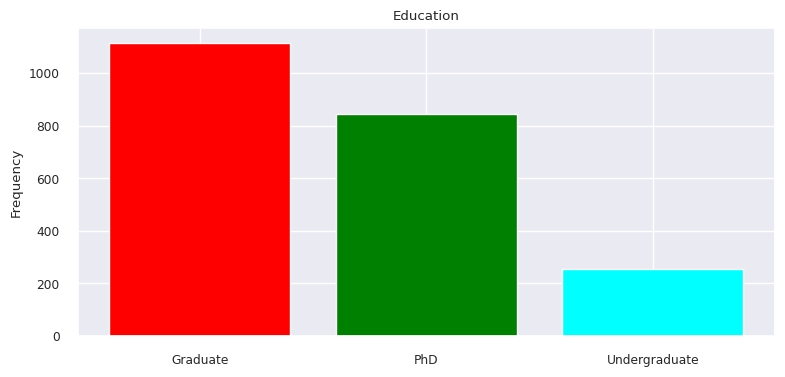

In [55]:
plt.figure(figsize = (9,4))
var = df["Education"]
varV = var.value_counts()
plt.bar(varV.index, varV, color=['red', 'green','cyan'])
plt.xticks(varV.index)
plt.ylabel("Frequency")
plt.title("Education")
plt.show()

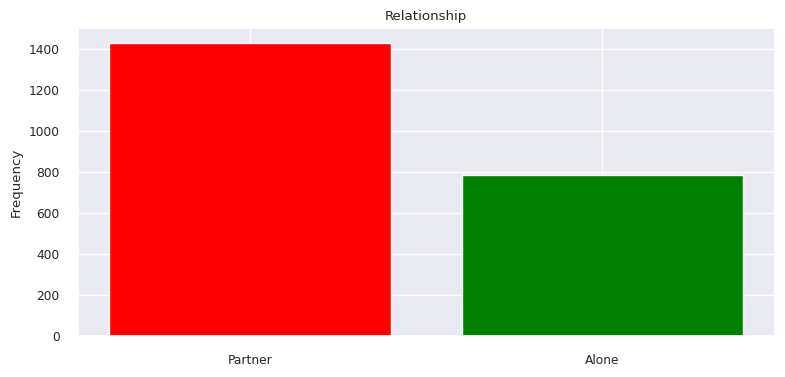

In [56]:
plt.figure(figsize = (9,4))
var = df["Relationship"]
varV = var.value_counts()
plt.bar(varV.index, varV, color=['red', 'green'])
plt.xticks(varV.index)
plt.ylabel("Frequency")
plt.title("Relationship")
plt.show()



> **Mathematical Arrangements**



In [57]:
# Mathematical Arrangements
  #Total Spending
df["Total_Spent"] = df["MntWines"]+ df["MntFruits"]+ df["MntMeatProducts"]+ df["MntFishProducts"]+ df["MntSweetProducts"]+ df["MntGoldProds"]

  # Children in a home
df["Children_Number"]=df["Kidhome"]+df["Teenhome"]

  #Family member number in a home
df["Family_number"]=df["Relationship"].replace({"Alone":1,"Partner":2})+df["Children_Number"]


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 34 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2216 non-null   int64         
 1   Year_Birth           2216 non-null   int64         
 2   Education            2216 non-null   object        
 3   Marital_Status       2216 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2216 non-null   int64         
 6   Teenhome             2216 non-null   int64         
 7   Dt_Customer          2216 non-null   datetime64[ns]
 8   Recency              2216 non-null   int64         
 9   MntWines             2216 non-null   int64         
 10  MntFruits            2216 non-null   int64         
 11  MntMeatProducts      2216 non-null   int64         
 12  MntFishProducts      2216 non-null   int64         
 13  MntSweetProducts     2216 non-nul



> **Descriptions for rows**



In [58]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Total_Spent,Children_Number,Family_number
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.0,2216.0,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,5588.353339,1968.820397,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,...,0.064079,0.013538,0.009477,3.0,11.0,0.150271,54.179603,607.075361,0.947202,2.592509
std,3249.376275,11.985554,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,...,0.244950,0.115588,0.096907,0.0,0.0,0.357417,11.985554,602.900476,0.749062,0.905722
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,3.0,11.0,0.000000,27.000000,5.000000,0.000000,1.000000
25%,2814.750000,1959.000000,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,...,0.000000,0.000000,0.000000,3.0,11.0,0.000000,46.000000,69.000000,0.000000,2.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,...,0.000000,0.000000,0.000000,3.0,11.0,0.000000,53.000000,396.500000,1.000000,3.000000
75%,8421.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,...,0.000000,0.000000,0.000000,3.0,11.0,0.000000,64.000000,1048.000000,1.000000,3.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,1.000000,1.000000,1.000000,3.0,11.0,1.000000,130.000000,2525.000000,3.000000,5.000000


In [59]:
df.std()

<ipython-input-59-ce97bb7eaef8>:1: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.std()


ID                                     3249.376275
Year_Birth                               11.985554
Income                                25173.076661
Kidhome                                   0.536896
Teenhome                                  0.544181
Dt_Customer            232 days 11:15:24.558024988
Recency                                  28.948352
MntWines                                 337.32792
MntFruits                                39.793917
MntMeatProducts                         224.283273
MntFishProducts                          54.752082
MntSweetProducts                         41.072046
MntGoldProds                             51.815414
NumDealsPurchases                         1.923716
NumWebPurchases                           2.740951
NumCatalogPurchases                       2.926734
NumStorePurchases                         3.250785
NumWebVisitsMonth                         2.425359
AcceptedCmp3                              0.261106
AcceptedCmp4                   


> **REAARANGEMENTS**



1.   Max age is 130. İt is anormal situtation, data is old. So we should arrange data. Min age is 27. I decided to -20 for all people. And minimum age is 7.

2.   STD = 0 ; Z_CostContract and Z_Revenue #dropna




In [60]:
df["Age"]=df["Age"]-20 #1
to_drop = ["Z_CostContact","Z_Revenue"]
df = df.drop(to_drop, axis=1)
df.describe()


,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Total_Spent,Children_Number,Family_number
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,5588.353339,1968.820397,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,...,0.074007,0.073105,0.064079,0.013538,0.009477,0.150271,34.179603,607.075361,0.947202,2.592509
std,3249.376275,11.985554,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,...,0.261842,0.260367,0.244950,0.115588,0.096907,0.357417,11.985554,602.900476,0.749062,0.905722
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,5.000000,0.000000,1.000000
25%,2814.750000,1959.000000,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,26.000000,69.000000,0.000000,2.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33.000000,396.500000,1.000000,3.000000
75%,8421.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,44.000000,1048.000000,1.000000,3.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,110.000000,2525.000000,3.000000,5.000000


# **3. DATA VISUALISATION**

**General Histogram Graph**

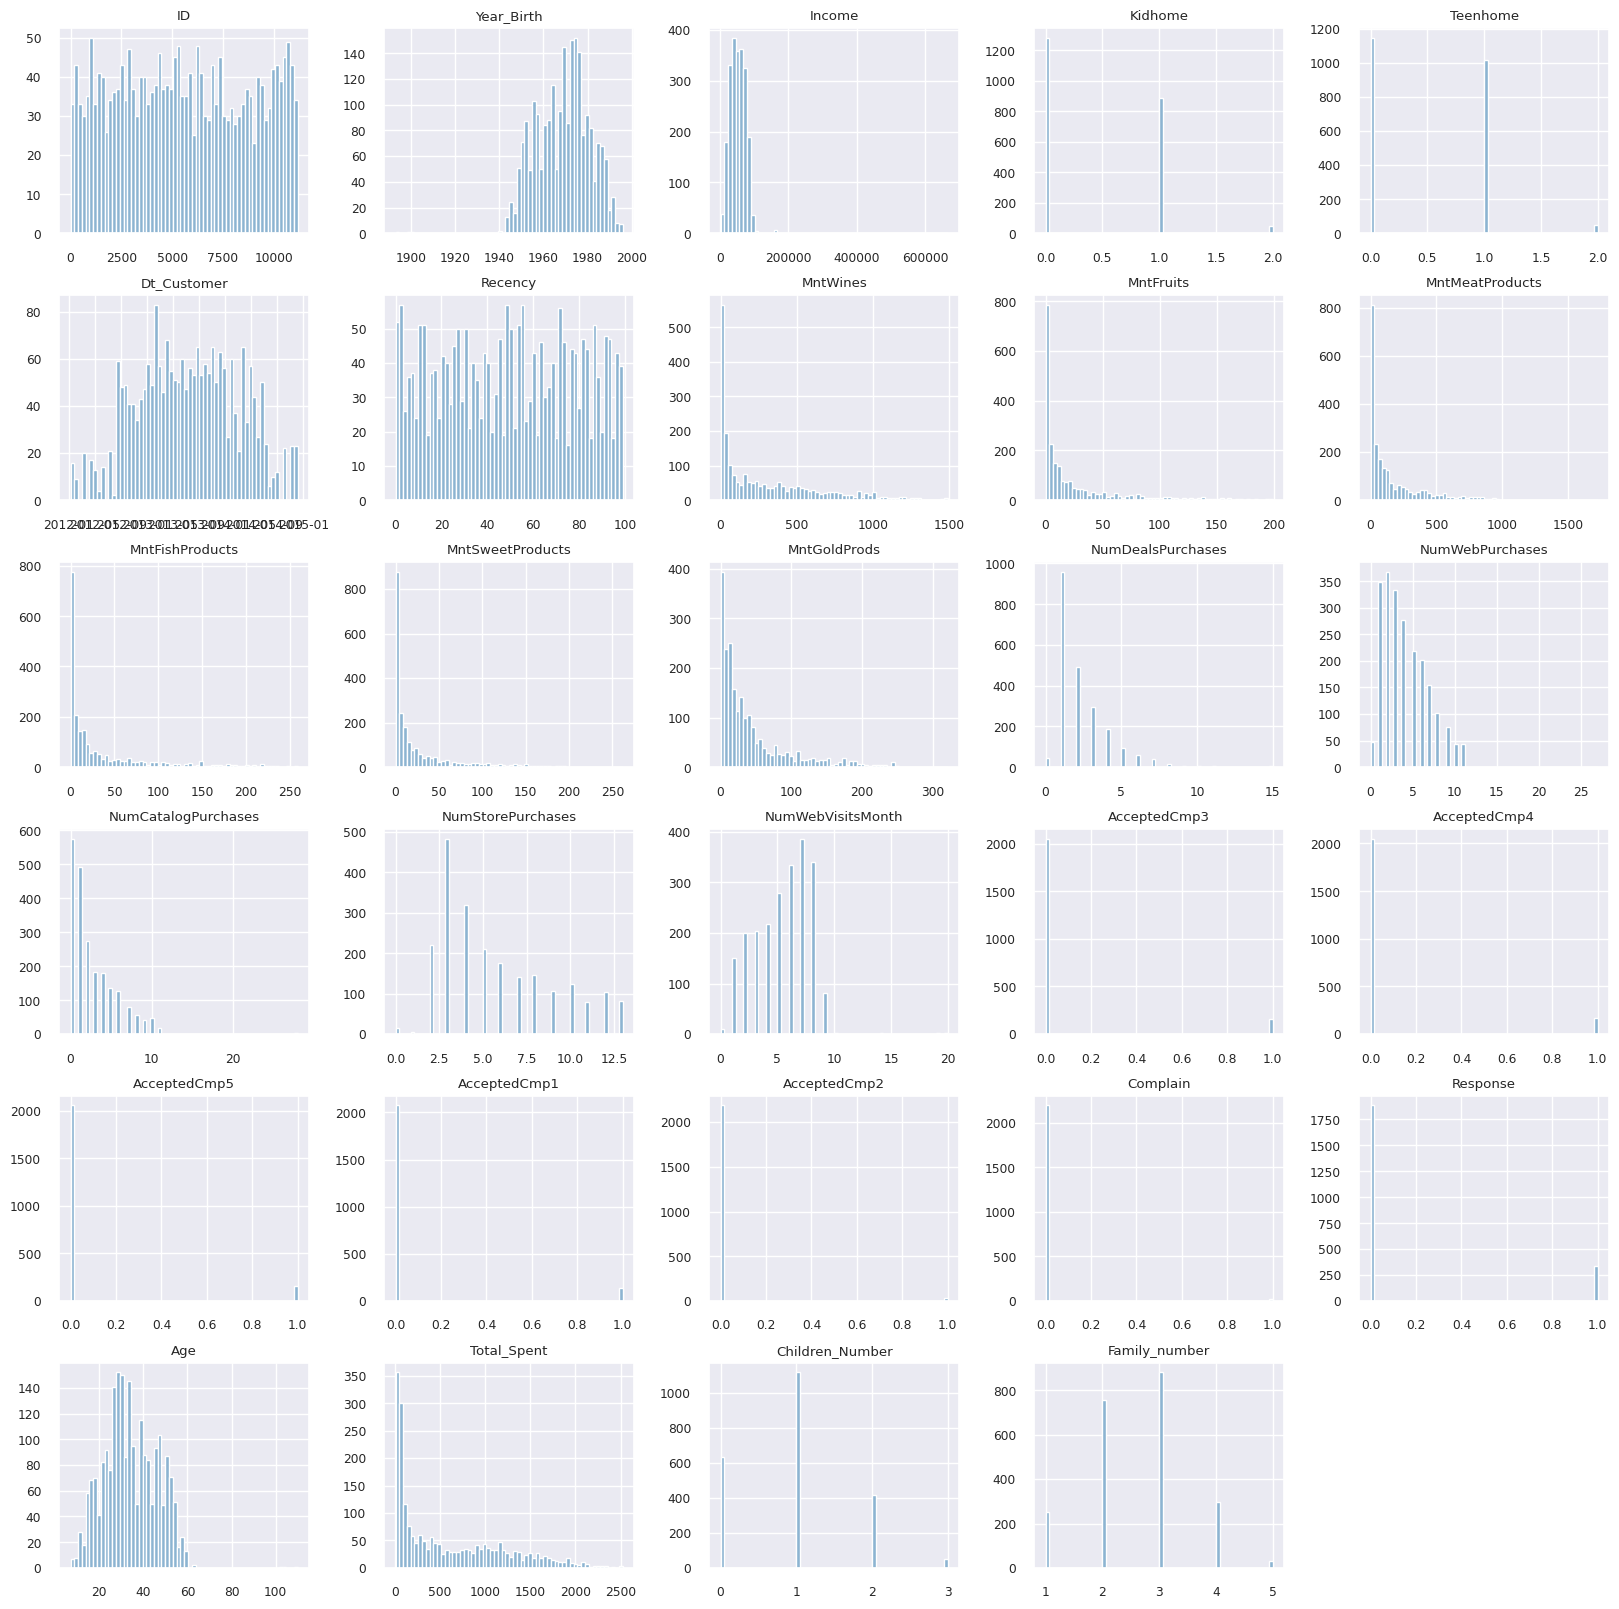

In [62]:
%matplotlib inline
df.hist(bins = 60, figsize=(20,20))
plt.show()

**Correlation**

Correlation is a statistical measure that indicates the extent to which two or more variables fluctuate in relation to each other. So we can firstly start with correlation.

<ipython-input-63-dca5f3874101>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


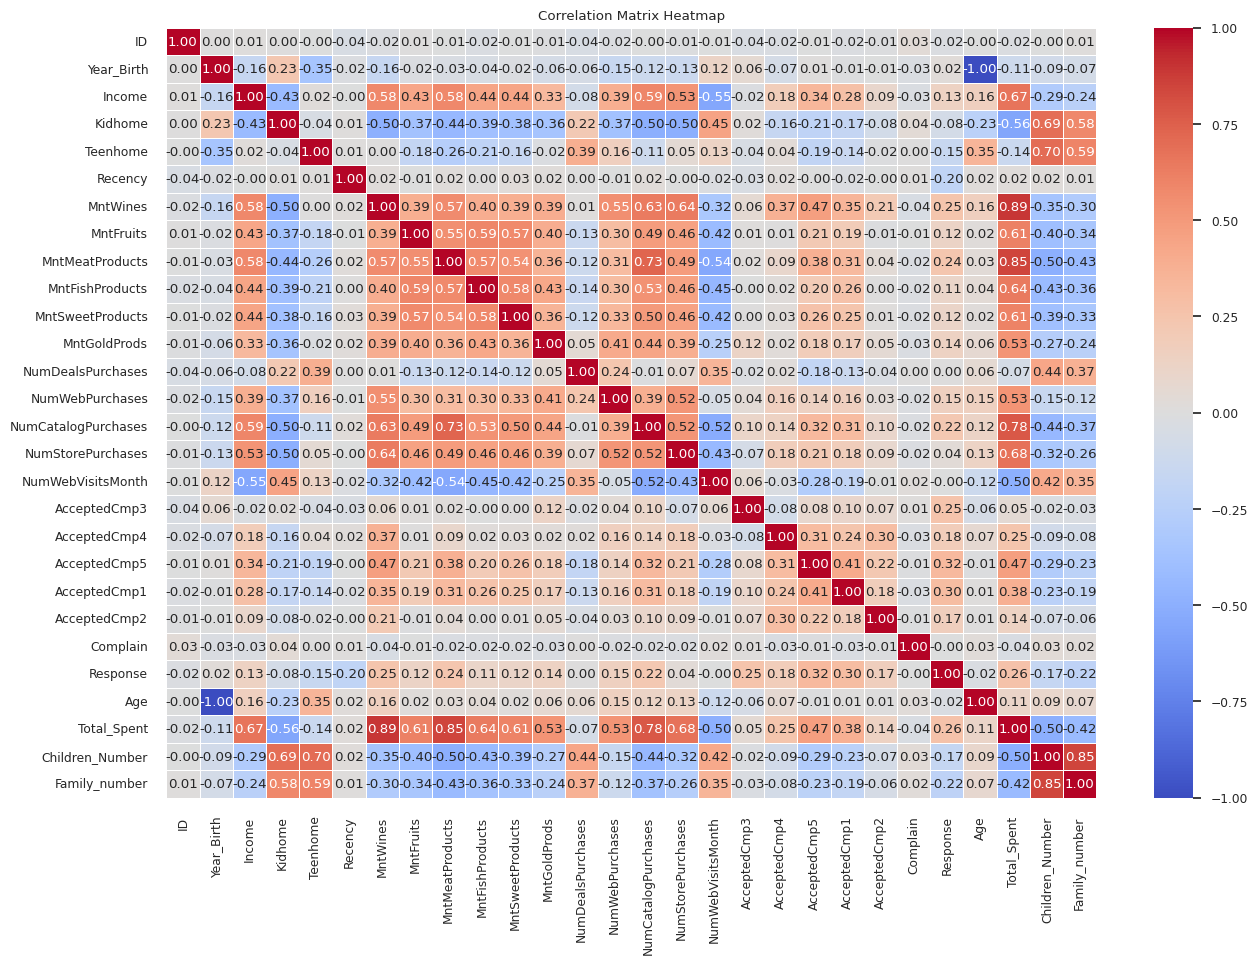

<ipython-input-63-dca5f3874101>:9: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


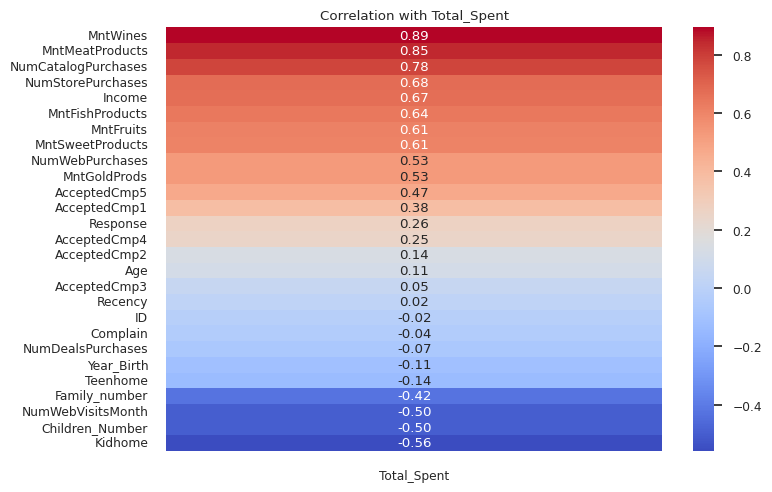

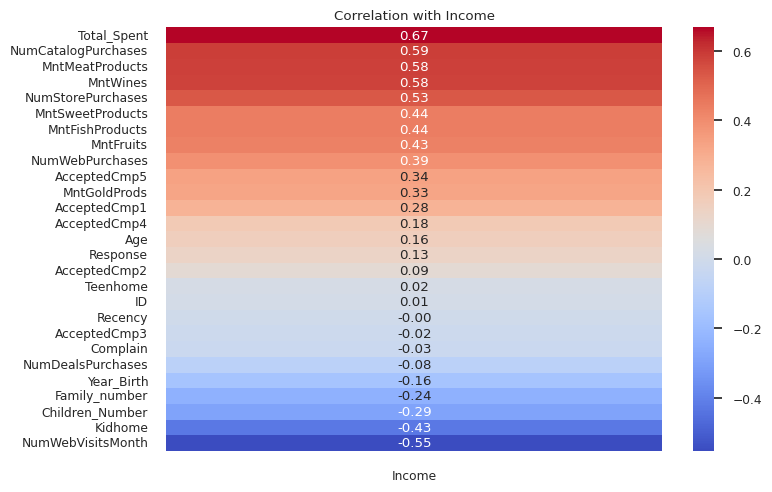

In [63]:
correlation_matrix = df.corr()

#Graph I.
plt.figure(figsize=(15,10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title("Correlation Matrix Heatmap")
plt.show()

corr = df.corr()
target_corr_Total_Spent = corr['Total_Spent'].drop('Total_Spent')
target_corr_Income = corr['Income'].drop('Income')

# Sort correlation values in descending order
target_corr_sorte_Total_Spent = target_corr_Total_Spent.sort_values(ascending=False)
target_corr_Income = target_corr_Income.sort_values(ascending=False)

#Graph II
# Create a heatmap of the correlations with the target column
sns.set(font_scale=0.8)
sns.set_style("white")
sns.set_palette("PuBuGn_d")
sns.heatmap(target_corr_sorte_Total_Spent.to_frame(), cmap="coolwarm", annot=True, fmt='.2f')
plt.title('Correlation with Total_Spent')
plt.show()

#Graph III
# Create a heatmap of the correlations with the target column
sns.set(font_scale=0.8)
sns.set_style("white")
sns.set_palette("PuBuGn_d")
sns.heatmap(target_corr_Income.to_frame(), cmap="coolwarm", annot=True, fmt='.2f')
plt.title('Correlation with Income')
plt.show()



# **4. CLUSTERING ANALYSIS**

**Data Preprocessing**

In this section, I will be preprocessing the data to perform clustering operations.

In [64]:
#Because of taken error at scaler.fit(dc), Dt_Customer is deleted.
to_drop = ["Dt_Customer"]
df = df.drop(to_drop, axis=1)
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Total_Spent,Children_Number,Family_number
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,5588.353339,1968.820397,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,...,0.074007,0.073105,0.064079,0.013538,0.009477,0.150271,34.179603,607.075361,0.947202,2.592509
std,3249.376275,11.985554,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,...,0.261842,0.260367,0.244950,0.115588,0.096907,0.357417,11.985554,602.900476,0.749062,0.905722
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,5.000000,0.000000,1.000000
25%,2814.750000,1959.000000,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,26.000000,69.000000,0.000000,2.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33.000000,396.500000,1.000000,3.000000
75%,8421.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,44.000000,1048.000000,1.000000,3.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,110.000000,2525.000000,3.000000,5.000000


In [65]:

#Label Encoding the object dtypes.
o = (df.dtypes == 'object')
object_cols = list(o[o].index)

print("Categorical variables in the dataset:", object_cols)

LE=LabelEncoder()
for i in object_cols:
    df[i]=df[[i]].apply(LE.fit_transform)

print("All features are now numerical\n")

#Creating a copy of data
dc = df.copy()

#Scaling
scaler = StandardScaler()
scaler.fit(dc)
scaled_dc = pd.DataFrame(scaler.transform(dc),columns= dc.columns )
print("All features are now scaled.\n")

#Scaled data to be used for reducing the dimensionality
print("Dataframe to be used for further modelling:\n")
scaled_dc.head()

Categorical variables in the dataset: ['Education', 'Marital_Status', 'Relationship']
All features are now numerical

All features are now scaled.

Dataframe to be used for further modelling:



,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Relationship,Total_Spent,Children_Number,Family_number
0,-0.019809,-0.986443,-0.894187,0.254218,0.234063,-0.823039,-0.928972,0.310532,0.978226,1.549429,...,-0.280839,-0.261661,-0.117148,-0.097812,2.377952,0.986443,-1.348829,1.675488,-1.264803,-1.758673
1,-1.051009,-1.236801,-0.894187,0.254218,-0.234559,1.039938,0.909066,-0.380509,-0.872024,-0.637328,...,-0.280839,-0.261661,-0.117148,-0.097812,-0.420530,1.236801,-1.348829,-0.962358,1.405806,0.450009
2,-0.445526,-0.318822,-0.894187,1.182303,0.769478,-0.823039,-0.928972,-0.795134,0.358511,0.569159,...,-0.280839,-0.261661,-0.117148,-0.097812,-0.420530,0.318822,0.741384,0.280250,-1.264803,-0.654332
3,0.182737,1.266777,-0.894187,1.182303,-1.017239,1.039938,-0.928972,-0.795134,-0.872024,-0.561922,...,-0.280839,-0.261661,-0.117148,-0.097812,-0.420530,-1.266777,0.741384,-0.919224,0.070501,0.450009
4,-0.081373,1.016420,0.569268,-0.673866,0.240221,1.039938,-0.928972,1.554407,-0.391671,0.418348,...,-0.280839,-0.261661,-0.117148,-0.097812,-0.420530,-1.016420,0.741384,-0.307044,0.070501,0.450009


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2216 non-null   int64  
 1   Year_Birth           2216 non-null   int64  
 2   Education            2216 non-null   int64  
 3   Marital_Status       2216 non-null   int64  
 4   Income               2216 non-null   float64
 5   Kidhome              2216 non-null   int64  
 6   Teenhome             2216 non-null   int64  
 7   Recency              2216 non-null   int64  
 8   MntWines             2216 non-null   int64  
 9   MntFruits            2216 non-null   int64  
 10  MntMeatProducts      2216 non-null   int64  
 11  MntFishProducts      2216 non-null   int64  
 12  MntSweetProducts     2216 non-null   int64  
 13  MntGoldProds         2216 non-null   int64  
 14  NumDealsPurchases    2216 non-null   int64  
 15  NumWebPurchases      2216 non-null   i

**Dimensionality reduction with PCA and Plotting**

Principal component analysis (PCA) is a technique for reducing the dimensionality of such datasets, increasing interpretability but at the same time minimizing information loss.

In [67]:
#For this project, I will be reducing the dimensions to 3.

#Initiating PCA to reduce dimentions aka features to 3
pca = PCA(n_components=3)
pca.fit(scaled_dc)
PCA_dc = pd.DataFrame(pca.transform(scaled_dc), columns=(["col1","col2", "col3"]))
PCA_dc.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,2216.0,6.412841e-18,2.854293,-5.687180,-2.483967,-0.814433,2.297571,8.296107
col2,2216.0,5.130272e-17,1.713280,-4.154517,-1.431427,0.031806,1.300444,5.842770
col3,2216.0,-2.244494e-17,1.400168,-4.399164,-0.844673,-0.118334,0.568925,7.698469


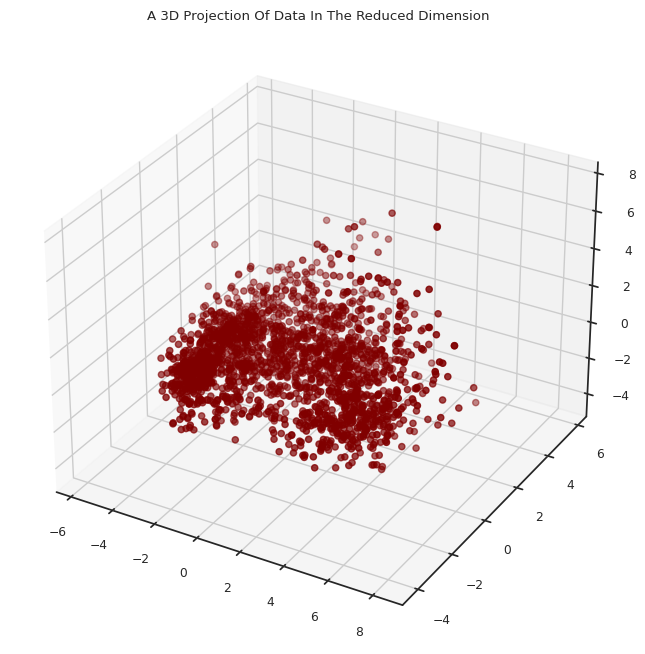

In [68]:
# 3D Projection Of Data In The Reduced Dimension
x =PCA_dc["col1"]
y =PCA_dc["col2"]
z =PCA_dc["col3"]
#To plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="maroon", marker="o" )
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()

**K value**

Method 1

First of all, as you know, in the Kmeans algorithm, there must be an optimum K (cluster) value. This K value represents our number of clusters. There are different methods to find this K value, but I will try to find the optimum number of clusters by trying different K values.

To do this, we first set up a for loop that takes values between 1 and 15. Each value here will go to the ncluster parameter in our KMeans algorithm in turn. Then, with the **inertia** function, we will return the WCSS value of each K value and turn these values into a graph. Then we will take the elbow point as the optimum number of clusters.
I am not sure my result is 2 or 5. I will try Elbow Method directly as second method.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

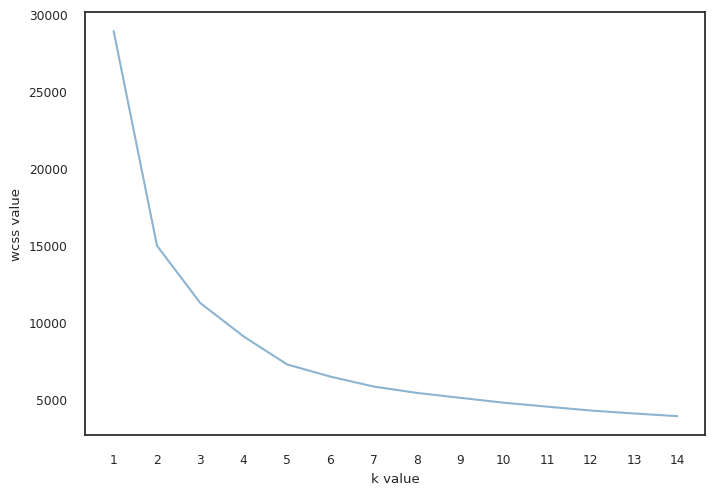

In [69]:
from sklearn.cluster import KMeans
wcss = []

for k in range(1,15):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(PCA_dc)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,15),wcss)
plt.xlabel("k value")
plt.xticks(range(1,15,1))
plt.ylabel("wcss value")
plt.show()

Method 2

By Elbow Method


Elbow Method to determine the number of clusters to be formed:


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

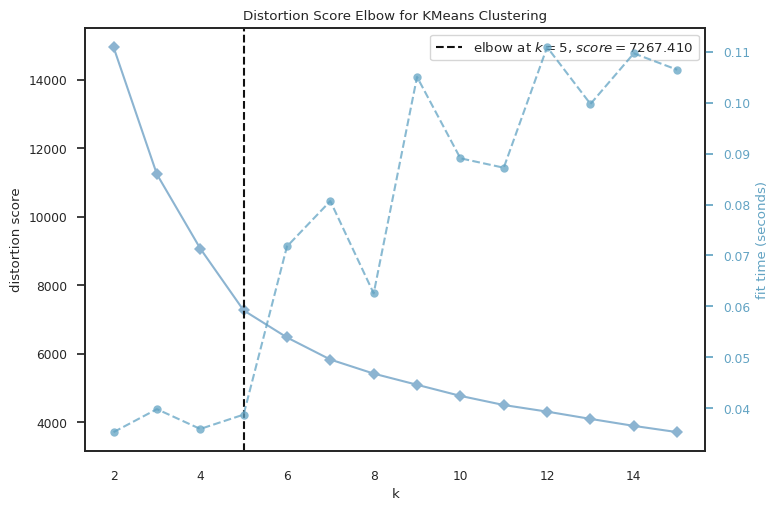

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [70]:
# Quick examination of elbow method to find numbers of clusters to make.
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=15)
Elbow_M.fit(PCA_dc)
Elbow_M.show()

The above cell indicates that **5 will be an optimal number of clusters for this data.** Next, we will be fitting the Agglomerative Clustering Model to get the final clusters.

In [71]:
#Initiating the Agglomerative Clustering model
AC = AgglomerativeClustering(n_clusters=5)
# fit model and predict clusters
yhat_AC = AC.fit_predict(PCA_dc)
PCA_dc["Clusters"] = yhat_AC
#Adding the Clusters feature to the orignal dataframe.
df["Clusters"]= yhat_AC

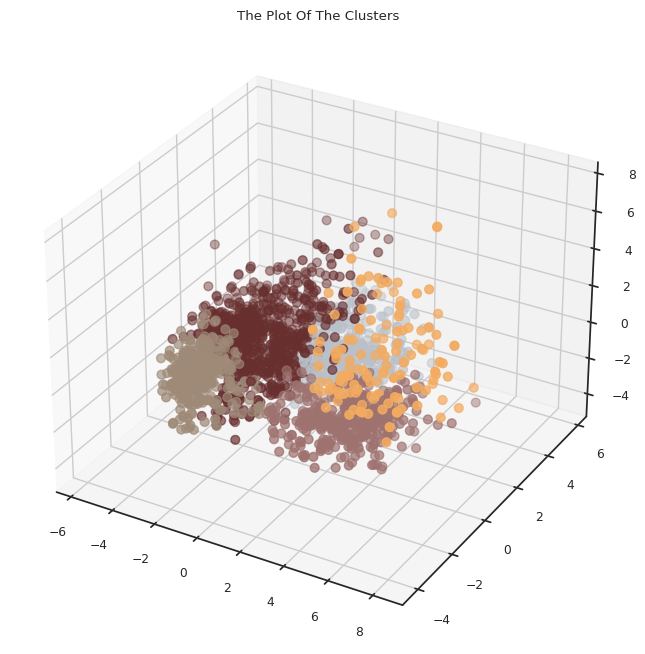

In [72]:
#Plotting the clusters
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
cmap = colors.ListedColormap(["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"])
ax.scatter(x, y, z, s=40, c=PCA_dc["Clusters"], marker='o',cmap = cmap)
ax.set_title("The Plot Of The Clusters")
plt.show()

**EVALUATING MODELS**

According to the previous result, we will evaluate the analysis and details. At this point, correlation analysis's results will be used.

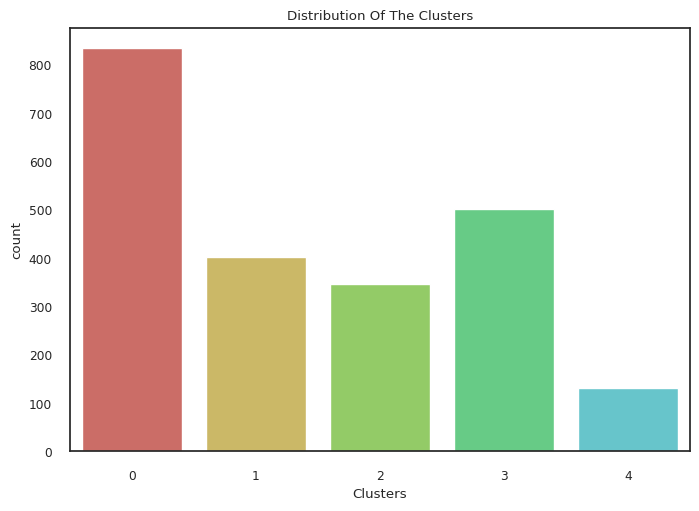

In [73]:
pal = sns.color_palette("hls",8)
pl = sns.countplot(x=df["Clusters"], palette= pal)
pl.set_title("Distribution Of The Clusters")

plt.show()

Investigations will be done according to the correlations. Let's begin;

<ipython-input-74-de4234939b45>:1: UserWarning: The palette list has more values (8) than needed (5), which may not be intended.
  pl = sns.scatterplot(data = df,x=df["Total_Spent"], y=df["Income"],hue=df["Clusters"], palette= pal)


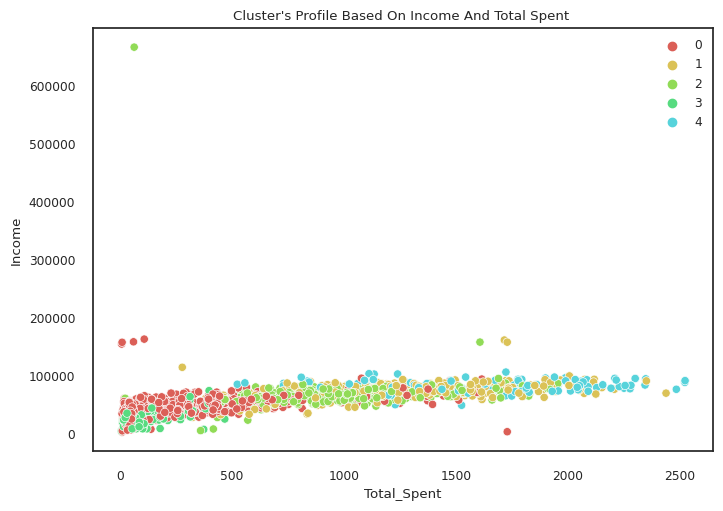

In [74]:
pl = sns.scatterplot(data = df,x=df["Total_Spent"], y=df["Income"],hue=df["Clusters"], palette= pal)
pl.set_title("Cluster's Profile Based On Income And Total Spent ")
plt.legend()
plt.show()

Clearly we see that there is anormal value at th ıncome. So we should drop it. ( It is clustor 2 so there is no any problem)

In [75]:
df = df[(df["Income"]<600000)] # Arrangements for ideal analysis.

<ipython-input-76-b75ba4041878>:1: UserWarning: The palette list has more values (8) than needed (5), which may not be intended.
  pl = sns.scatterplot(data = df,x=df["Total_Spent"], y=df["Income"],hue=df["Clusters"], palette= pal)


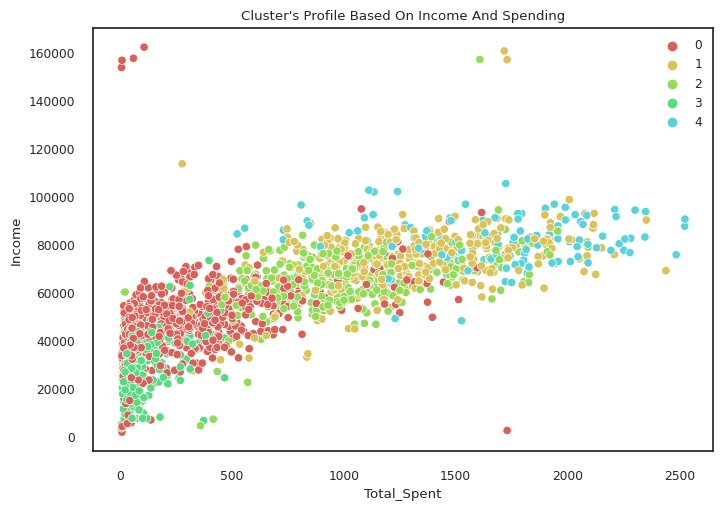

In [76]:
pl = sns.scatterplot(data = df,x=df["Total_Spent"], y=df["Income"],hue=df["Clusters"], palette= pal)
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()

Income vs spending plot shows the clusters

group 0: low spending & Average income

group 1: high spending & average income

group 2: Average spending & average income

group 3: Low spending & low income

group 4: high spending & high income

Then ı continue with the correlation table 1 and analysing the food habits.

In [77]:
num_cols = ['MntWines',
            'MntMeatProducts','NumCatalogPurchases','NumStorePurchases', "Income",'MntFishProducts',"MntFruits",
            'MntSweetProducts', 'NumWebPurchases','MntGoldProds']

IndexError: ignored

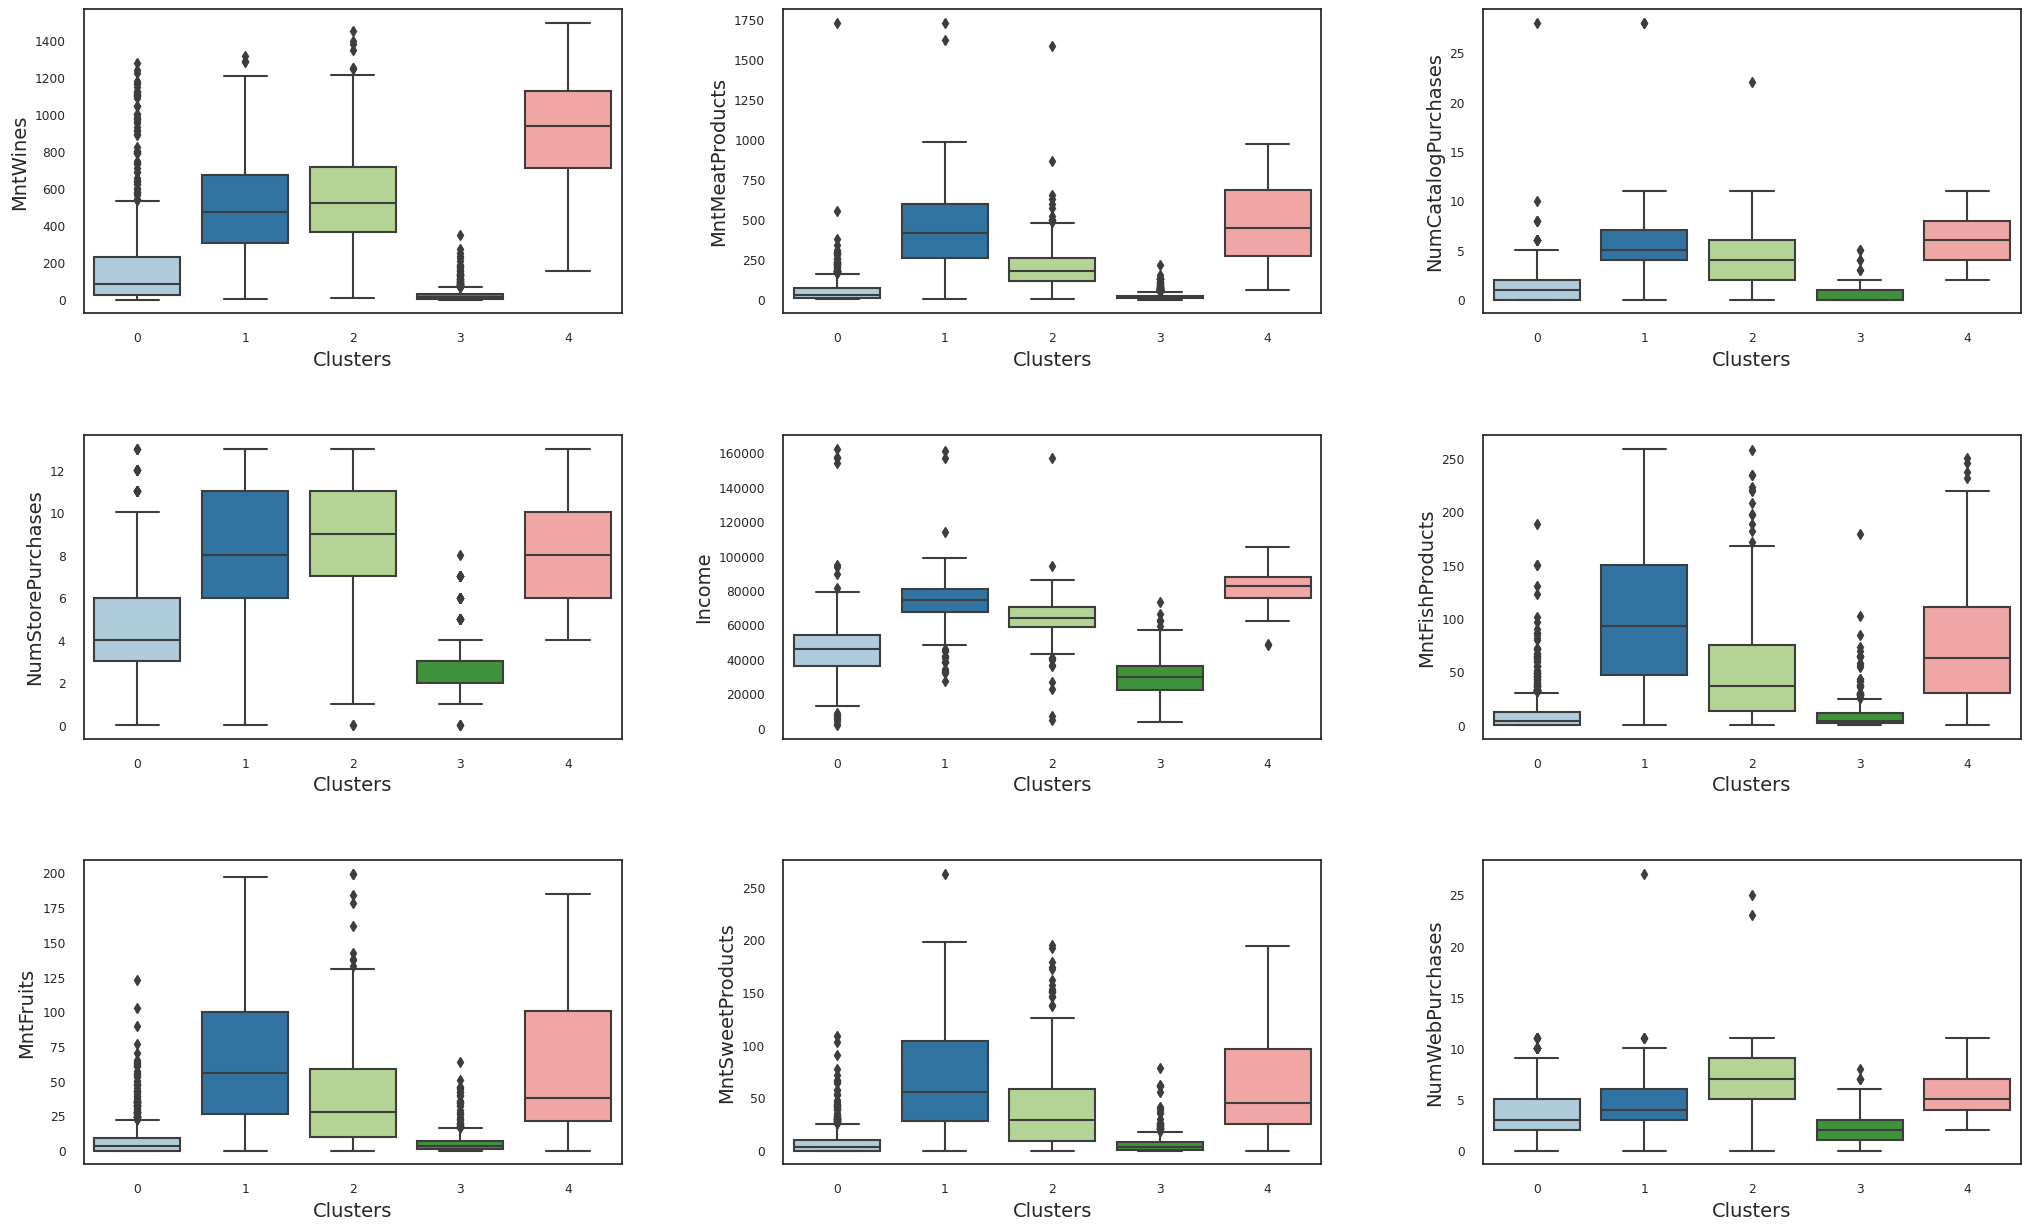

In [78]:
def graph_builder():

    def boxplot():
        n_cols = len(num_cols)
        rows = n_cols // 3
        _, axes = plt.subplots(ncols=3, nrows=rows, figsize=(25, 5 * rows))
        plt.subplots_adjust(wspace=0.3, hspace=0.4)
        for num, col in enumerate(num_cols):
            b = sns.boxplot(
                 data=df,
                 y=col,
                 x="Clusters",
                 palette="Paired",
                 ax=axes.reshape(-1)[num])
            b.set_xlabel('Clusters', fontsize=14)
            b.set_ylabel(f'{df[col].name}', fontsize=14)
            sns.set_style('darkgrid')

    boxplot()

graph_builder()

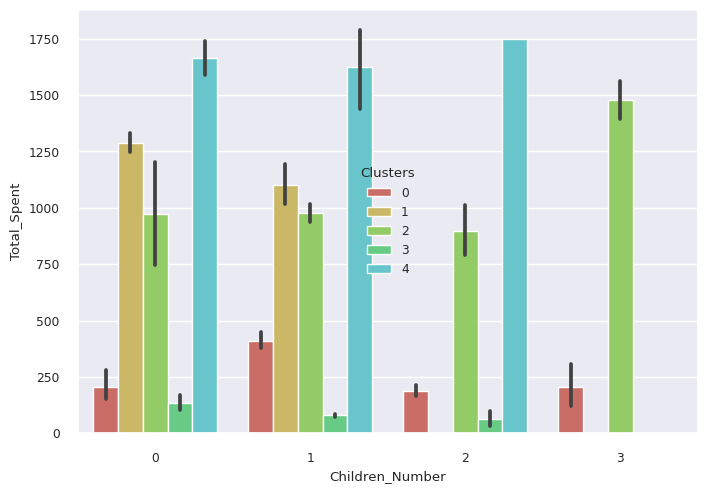

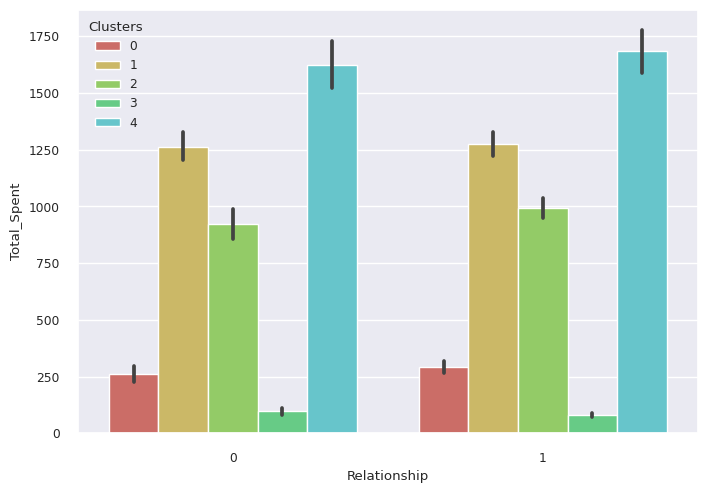

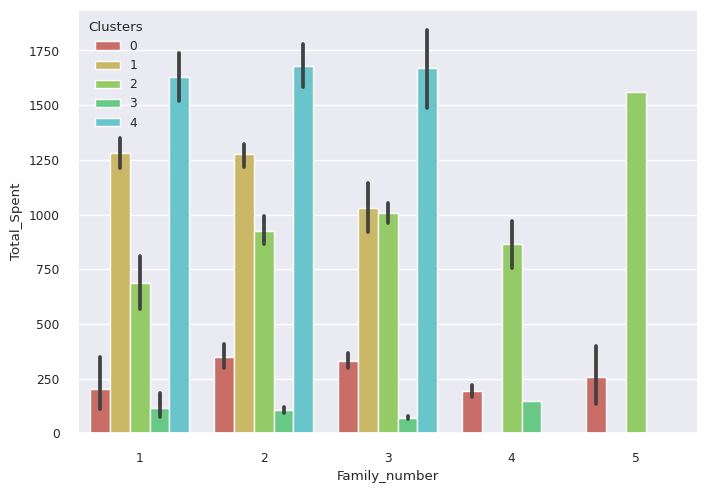

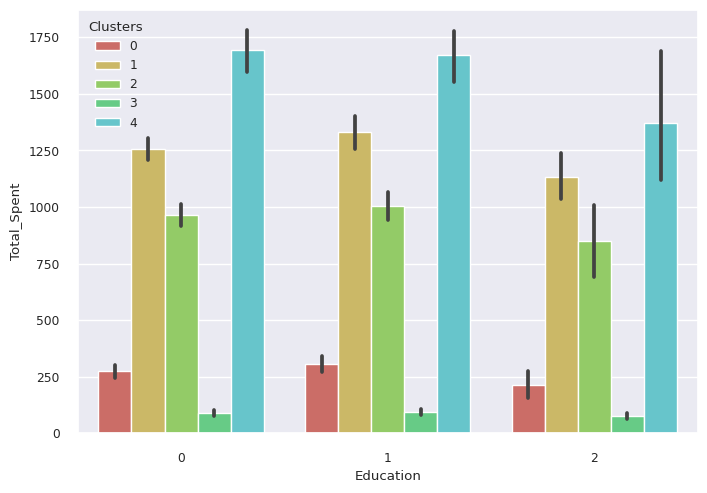

In [79]:
Personal = [ "Children_Number","Relationship","Family_number","Education"]
for i in Personal:
    plt.figure()
    sns.barplot(x=df[i], y=df["Total_Spent"], hue =df["Clusters"],palette=pal)
    plt.show()

# **5. CUSTOMER ANALYSIS**

There are 5 types customer profile.
They are ;


1.   Cluster 0
2.   Cluster 1

1.   Cluster 2
2.   Cluster 3

1.   Cluster 4










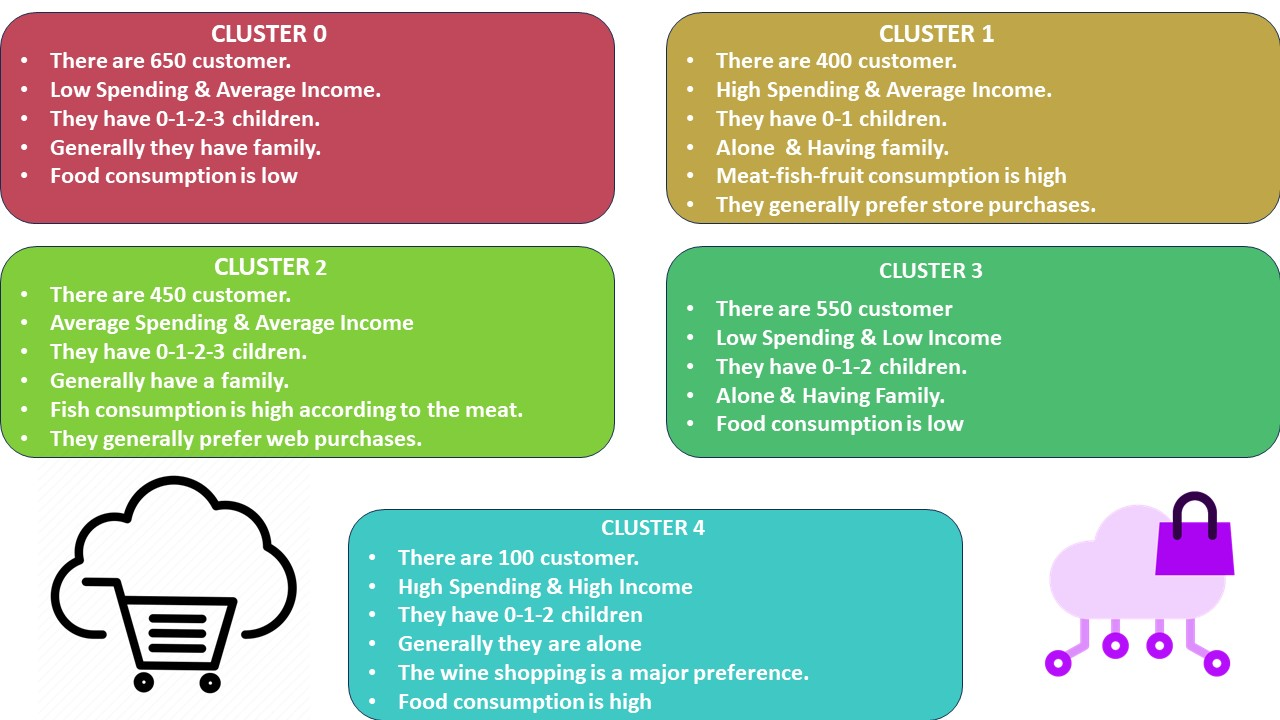

# **6. CONCLUSION**

In this project, I analyzed customer profiles using the clustering method. The aim of this project is to define the customer profiles by using this clustering method's result and give directions to the shopping personnel. In this way, marketing strategies will be planned clearly.